In [1]:
%matplotlib inline

import numpy as np
import time
from qap_tools import prepare_qap, plot_qap, qap_eval
from sga import sga, local_search, random_swap, lsp, lsps, pmx

In [14]:
def solve_qap(fname, num_iter, N, M, tc=.9, tm=.9, log_interval=1, plot_file=None, mutation=local_search, 
              crossover=ox):
    dist, flow, opt = prepare_qap(fname)

    globals()[fname] = {'dist': dist, 'flow': flow, 'opt': opt, 'num_iter': num_iter}

    t0 = time.time()
    sol, log = sga(eval(fname)['dist'].shape[0], lambda x: -qap_eval(x, eval(fname)['dist'], eval(fname)['flow']), 
                   N, M, tc, tm, num_iter, mutation=mutation, crossover_fn=crossover, 
                   logging=True, log_interval=log_interval)
    eval(fname)['sol'] = sol
    eval(fname)['log'] = log
    print time.time() - t0
    
    plot_qap(eval(fname)['log'], eval(fname)['opt'], fname=plot_file)

In [3]:
def ox(pairs, tc):
    changed = np.random.rand(pairs.shape[0]) < tc
    num_changed = changed.nonzero()[0].size
    parents = pairs[changed]
    not_parents = pairs[~changed].reshape(-1, pairs.shape[2])
    if not num_changed:
        return not_parents
    
    inds = np.sort(np.random.choice(pairs.shape[2], size=(num_changed, 2)), axis=1)
    
    C = []
    
    for i in xrange(num_changed):
        beg_idx, end_idx = inds[i]
        tail_len = pairs.shape[2] - end_idx - 1
        middle = slice(beg_idx, end_idx + 1)
        
        p1, p2 = parents[i]
        rev_parents = np.array([p2, p1])
        
        kids = np.zeros_like(parents[i])
        kids[:, middle] = parents[i][:, middle]
        
        def fix_child(c, p1, p2):
            p1_middle_set = set(p1[middle])
            
            p2_shifted = np.hstack([p2[end_idx+1:], p2[:end_idx+1]])
            p2_part = [i for i in p2_shifted if i not in p1_middle_set]
            c[end_idx+1:] = p2_part[:tail_len]
            c[:beg_idx] = p2_part[tail_len:]
            
        fix_child(kids[0], p1, p2)
        fix_child(kids[1], p2, p1)
            
        C.append(kids)
        
    C.append(not_parents)
        
    return np.vstack(C)

In [41]:
def ppx(pairs, tc):
    changed = np.random.rand(pairs.shape[0]) < tc
    num_changed = changed.nonzero()[0].size
    parents = pairs[changed]
    not_parents = pairs[~changed].reshape(-1, pairs.shape[2])
    if not num_changed:
        return not_parents
    
    inds = np.random.binomial(1, .5, size=(num_changed, pairs.shape[2]))
    
    C = []
    
    for i in xrange(num_changed):
               
        ic = inds[i]
        pair = parents[i]
        
        def make_child(pair, ic):
            c = []
            pair_inds = [0, 0]
            used = set()
            for i in ic:
                while pair[i][pair_inds[i]] in used:
                    pair_inds[i] += 1
                elem = pair[i][pair_inds[i]]
                c.append(elem)
                used.add(elem)
                
            return np.array(c)
            
        c1, c2 = make_child(pair, ic), make_child(pair, 1 - ic)
            
        C += [c1, c2]
        
    C.append(not_parents)
        
    return np.vstack(C)

Optimal solution for nug12: 578.0
Starting iteration 1 out of 50...
Current population stats: 	-938.000 	-809.127 	-690.000
Starting iteration 2 out of 50...
Current population stats: 	-824.000 	-781.913 	-690.000
Starting iteration 3 out of 50...
Current population stats: 	-796.000 	-764.340 	-654.000
Starting iteration 4 out of 50...
Current population stats: 	-782.000 	-752.433 	-654.000
Starting iteration 5 out of 50...
Current population stats: 	-770.000 	-742.247 	-654.000
Starting iteration 6 out of 50...
Current population stats: 	-762.000 	-733.900 	-654.000
Starting iteration 7 out of 50...
Current population stats: 	-754.000 	-728.033 	-654.000
Starting iteration 8 out of 50...
Current population stats: 	-748.000 	-722.473 	-654.000
Starting iteration 9 out of 50...
Current population stats: 	-740.000 	-717.900 	-654.000
Starting iteration 10 out of 50...
Current population stats: 	-736.000 	-714.433 	-654.000
Starting iteration 11 out of 50...
Current population stats: 	-73

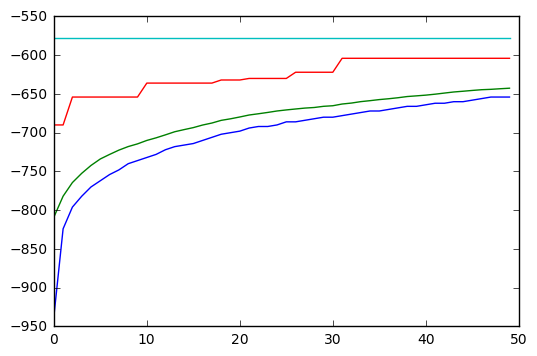

In [6]:
solve_qap('nug12', 50, 300, 200, mutation=random_swap)

# to jest ten sam czas, co poniżej, ale inna mutacja (random swap)

Optimal solution for nug12: 578.0
Starting iteration 1 out of 50...
Current population stats: 	-960.000 	-810.060 	-708.000
Starting iteration 2 out of 50...
Current population stats: 	-772.000 	-728.440 	-618.000
Starting iteration 3 out of 50...
Current population stats: 	-720.000 	-688.080 	-618.000
Starting iteration 4 out of 50...
Current population stats: 	-692.000 	-664.900 	-614.000
Starting iteration 5 out of 50...
Current population stats: 	-670.000 	-645.560 	-600.000
Starting iteration 6 out of 50...
Current population stats: 	-654.000 	-634.660 	-600.000
Starting iteration 7 out of 50...
Current population stats: 	-644.000 	-628.060 	-600.000
Starting iteration 8 out of 50...
Current population stats: 	-634.000 	-618.440 	-578.000
Starting iteration 9 out of 50...
Current population stats: 	-628.000 	-613.280 	-578.000
Starting iteration 10 out of 50...
Current population stats: 	-620.000 	-607.080 	-578.000
Starting iteration 11 out of 50...
Current population stats: 	-61

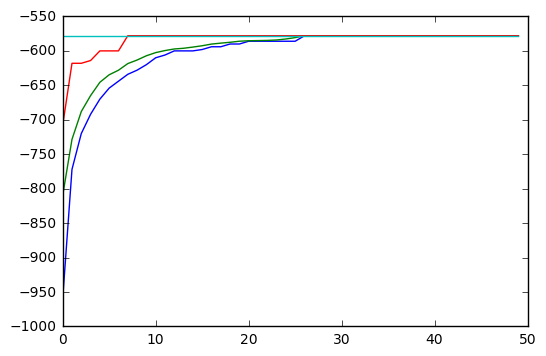

In [12]:
solve_qap('nug12', 50, 100, 80, crossover=pmx)

# tu jest local search

Optimal solution for nug12: 578.0
Starting iteration 1 out of 10...
Current population stats: 	-908.000 	-815.180 	-686.000
Starting iteration 2 out of 10...
Current population stats: 	-772.000 	-647.100 	-586.000
Starting iteration 3 out of 10...
Current population stats: 	-622.000 	-605.820 	-578.000
Starting iteration 4 out of 10...
Current population stats: 	-604.000 	-595.140 	-578.000
Starting iteration 5 out of 10...
Current population stats: 	-598.000 	-589.860 	-578.000
Starting iteration 6 out of 10...
Current population stats: 	-590.000 	-585.820 	-578.000
Starting iteration 7 out of 10...
Current population stats: 	-586.000 	-584.760 	-578.000
Starting iteration 8 out of 10...
Current population stats: 	-586.000 	-584.000 	-578.000
Starting iteration 9 out of 10...
Current population stats: 	-586.000 	-583.480 	-578.000
Starting iteration 10 out of 10...
Current population stats: 	-586.000 	-582.120 	-578.000
0.307307004929


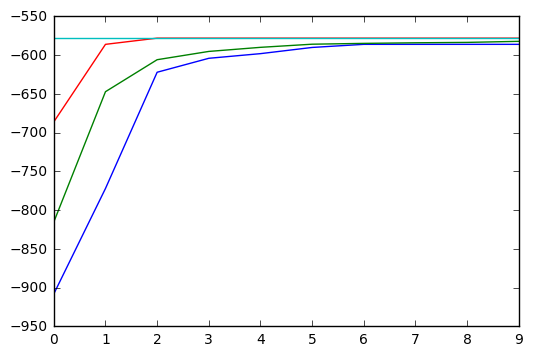

In [19]:
solve_qap('nug12', 10, 100, 80, mutation=local_search_plus)

Optimal solution for nug14: 1014.0
Starting iteration 1 out of 50...
Current population stats: 	-1526.000 	-1361.020 	-1150.000
Starting iteration 2 out of 50...
Current population stats: 	-1378.000 	-1293.680 	-1144.000
Starting iteration 3 out of 50...
Current population stats: 	-1318.000 	-1248.887 	-1090.000
Starting iteration 4 out of 50...
Current population stats: 	-1272.000 	-1213.560 	-1090.000
Starting iteration 5 out of 50...
Current population stats: 	-1232.000 	-1182.887 	-1064.000
Starting iteration 6 out of 50...
Current population stats: 	-1200.000 	-1158.540 	-1064.000
Starting iteration 7 out of 50...
Current population stats: 	-1172.000 	-1137.307 	-1038.000
Starting iteration 8 out of 50...
Current population stats: 	-1156.000 	-1122.347 	-1038.000
Starting iteration 9 out of 50...
Current population stats: 	-1140.000 	-1106.660 	-1014.000
Starting iteration 10 out of 50...
Current population stats: 	-1124.000 	-1095.113 	-1014.000
Starting iteration 11 out of 50...

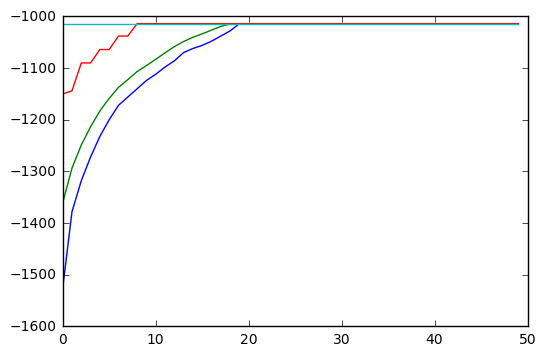

In [15]:
solve_qap('nug14', 50, 300, 120, tc=.3)

Optimal solution for nug15: 1150.0
Starting iteration 1 out of 50...
Current population stats: 	-1756.000 	-1584.080 	-1406.000
Starting iteration 2 out of 50...
Current population stats: 	-1602.000 	-1508.873 	-1308.000
Starting iteration 3 out of 50...
Current population stats: 	-1538.000 	-1453.640 	-1308.000
Starting iteration 4 out of 50...
Current population stats: 	-1480.000 	-1410.180 	-1288.000
Starting iteration 5 out of 50...
Current population stats: 	-1442.000 	-1376.087 	-1260.000
Starting iteration 6 out of 50...
Current population stats: 	-1400.000 	-1347.413 	-1236.000
Starting iteration 7 out of 50...
Current population stats: 	-1372.000 	-1321.753 	-1236.000
Starting iteration 8 out of 50...
Current population stats: 	-1344.000 	-1300.787 	-1208.000
Starting iteration 9 out of 50...
Current population stats: 	-1318.000 	-1280.233 	-1204.000
Starting iteration 10 out of 50...
Current population stats: 	-1302.000 	-1264.600 	-1188.000
Starting iteration 11 out of 50...

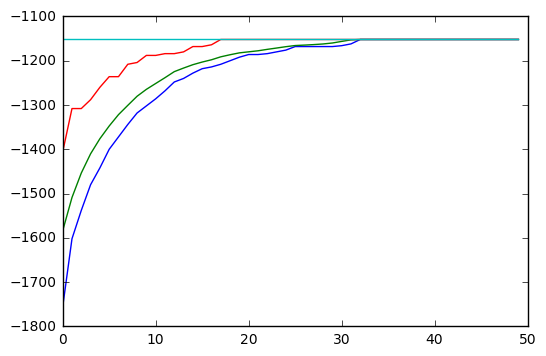

In [61]:
solve_qap('nug15', 50, 300, 120, .3, crossover=ppx)

Optimal solution for nug16a: 1610.0
Starting iteration 1 out of 50...
Current population stats: 	-2368.000 	-2155.410 	-1946.000
Starting iteration 2 out of 50...
Current population stats: 	-2160.000 	-2048.200 	-1796.000
Starting iteration 3 out of 50...
Current population stats: 	-2068.000 	-1977.410 	-1796.000
Starting iteration 4 out of 50...
Current population stats: 	-1994.000 	-1920.670 	-1796.000
Starting iteration 5 out of 50...
Current population stats: 	-1936.000 	-1876.960 	-1754.000
Starting iteration 6 out of 50...
Current population stats: 	-1896.000 	-1843.640 	-1730.000
Starting iteration 7 out of 50...
Current population stats: 	-1860.000 	-1814.800 	-1730.000
Starting iteration 8 out of 50...
Current population stats: 	-1826.000 	-1792.410 	-1728.000
Starting iteration 9 out of 50...
Current population stats: 	-1804.000 	-1773.500 	-1700.000
Starting iteration 10 out of 50...
Current population stats: 	-1782.000 	-1756.730 	-1690.000
Starting iteration 11 out of 50..

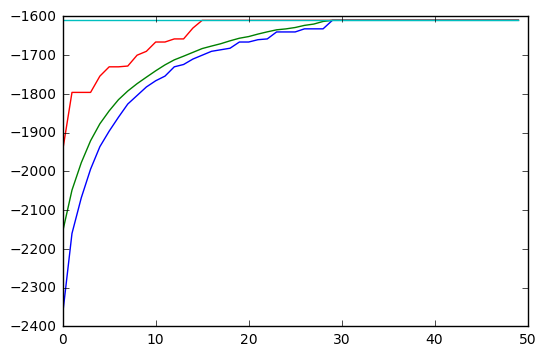

In [22]:
solve_qap('nug16a', 50, 200, 100, .3)

Optimal solution for nug16b: 1240.0
Starting iteration 1 out of 50...
Current population stats: 	-1938.000 	-1723.610 	-1526.000
Starting iteration 2 out of 50...
Current population stats: 	-1720.000 	-1630.780 	-1462.000
Starting iteration 3 out of 50...
Current population stats: 	-1644.000 	-1565.740 	-1414.000
Starting iteration 4 out of 50...
Current population stats: 	-1582.000 	-1515.690 	-1382.000
Starting iteration 5 out of 50...
Current population stats: 	-1536.000 	-1477.430 	-1362.000
Starting iteration 6 out of 50...
Current population stats: 	-1492.000 	-1440.730 	-1354.000
Starting iteration 7 out of 50...
Current population stats: 	-1458.000 	-1414.420 	-1342.000
Starting iteration 8 out of 50...
Current population stats: 	-1428.000 	-1391.150 	-1316.000
Starting iteration 9 out of 50...
Current population stats: 	-1404.000 	-1374.310 	-1316.000
Starting iteration 10 out of 50...
Current population stats: 	-1386.000 	-1358.740 	-1300.000
Starting iteration 11 out of 50..

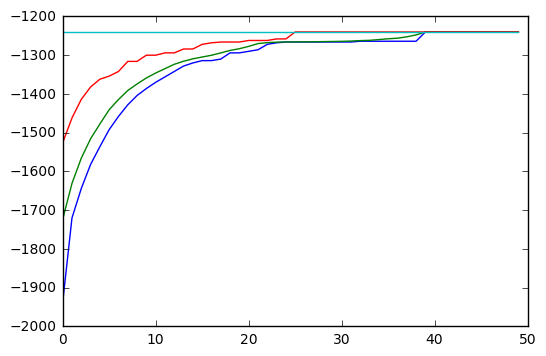

In [24]:
solve_qap('nug16b', 50, 200, 100, .3)

Optimal solution for nug17: 1732.0
Starting iteration 1 out of 10...
Current population stats: 	-2642.000 	-2327.629 	-2062.000
Starting iteration 2 out of 10...
Current population stats: 	-2310.000 	-2068.477 	-1798.000
Starting iteration 3 out of 10...
Current population stats: 	-1984.000 	-1908.117 	-1762.000
Starting iteration 4 out of 10...
Current population stats: 	-1912.000 	-1859.203 	-1758.000
Starting iteration 5 out of 10...
Current population stats: 	-1866.000 	-1826.851 	-1736.000
Starting iteration 6 out of 10...
Current population stats: 	-1840.000 	-1807.814 	-1734.000
Starting iteration 7 out of 10...
Current population stats: 	-1820.000 	-1792.080 	-1734.000
Starting iteration 8 out of 10...
Current population stats: 	-1802.000 	-1780.069 	-1734.000
Starting iteration 9 out of 10...
Current population stats: 	-1790.000 	-1769.920 	-1734.000
Starting iteration 10 out of 10...
Current population stats: 	-1780.000 	-1761.403 	-1732.000
5.51206493378


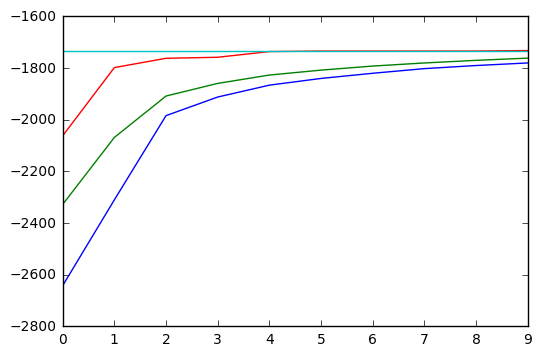

In [30]:
solve_qap('nug17', 10, 700, 400, .3, 1, mutation=lsps(5, .9))

Optimal solution for nug18: 1930.0
Starting iteration 1 out of 50...
Current population stats: 	-2860.000 	-2564.095 	-2260.000
Starting iteration 2 out of 50...
Current population stats: 	-2534.000 	-2427.965 	-2194.000
Starting iteration 3 out of 50...
Current population stats: 	-2420.000 	-2338.435 	-2116.000
Starting iteration 4 out of 50...
Current population stats: 	-2336.000 	-2271.840 	-2062.000
Starting iteration 5 out of 50...
Current population stats: 	-2282.000 	-2222.468 	-2022.000
Starting iteration 6 out of 50...
Current population stats: 	-2234.000 	-2182.635 	-2022.000
Starting iteration 7 out of 50...
Current population stats: 	-2192.000 	-2146.407 	-2008.000
Starting iteration 8 out of 50...
Current population stats: 	-2158.000 	-2115.748 	-2004.000
Starting iteration 9 out of 50...
Current population stats: 	-2128.000 	-2088.482 	-2004.000
Starting iteration 10 out of 50...
Current population stats: 	-2094.000 	-2063.817 	-2002.000
Starting iteration 11 out of 50...

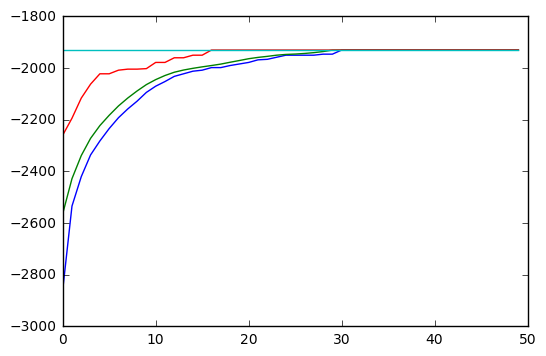

In [31]:
solve_qap('nug18', 50, 800, 500, .3, 1)

Optimal solution for nug20: 2570.0
Starting iteration 1 out of 50...
Current population stats: 	-3810.000 	-3404.563 	-3102.000
Starting iteration 2 out of 50...
Current population stats: 	-3360.000 	-3231.617 	-2958.000
Starting iteration 3 out of 50...
Current population stats: 	-3212.000 	-3115.023 	-2890.000
Starting iteration 4 out of 50...
Current population stats: 	-3114.000 	-3030.267 	-2844.000
Starting iteration 5 out of 50...
Current population stats: 	-3028.000 	-2959.313 	-2796.000
Starting iteration 6 out of 50...
Current population stats: 	-2960.000 	-2898.630 	-2778.000
Starting iteration 7 out of 50...
Current population stats: 	-2902.000 	-2850.840 	-2724.000
Starting iteration 8 out of 50...
Current population stats: 	-2854.000 	-2812.763 	-2686.000
Starting iteration 9 out of 50...
Current population stats: 	-2820.000 	-2782.827 	-2638.000
Starting iteration 10 out of 50...
Current population stats: 	-2794.000 	-2758.917 	-2638.000
Starting iteration 11 out of 50...

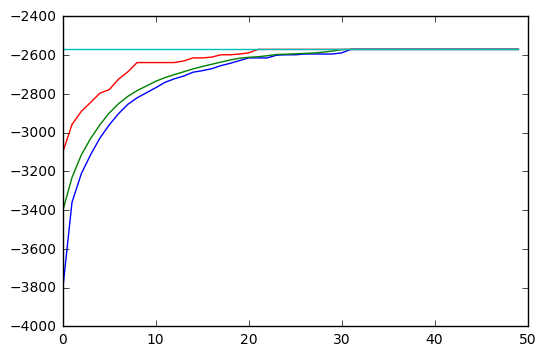

In [46]:
solve_qap('nug20', 50, 600, 400, .3, 1)

Optimal solution for nug21: 2438.0
Starting iteration 1 out of 20...
Current population stats: 	-3842.000 	-3427.470 	-2970.000
Starting iteration 2 out of 20...
Current population stats: 	-3382.000 	-2985.150 	-2628.000
Starting iteration 3 out of 20...
Current population stats: 	-2808.000 	-2703.510 	-2486.000
Starting iteration 4 out of 20...
Current population stats: 	-2706.000 	-2614.350 	-2478.000
Starting iteration 5 out of 20...
Current population stats: 	-2618.000 	-2558.250 	-2454.000
Starting iteration 6 out of 20...
Current population stats: 	-2558.000 	-2521.030 	-2438.000
Starting iteration 7 out of 20...
Current population stats: 	-2530.000 	-2504.380 	-2438.000
Starting iteration 8 out of 20...
Current population stats: 	-2518.000 	-2489.490 	-2438.000
Starting iteration 9 out of 20...
Current population stats: 	-2494.000 	-2476.050 	-2438.000
Starting iteration 10 out of 20...
Current population stats: 	-2484.000 	-2468.070 	-2438.000
Starting iteration 11 out of 20...

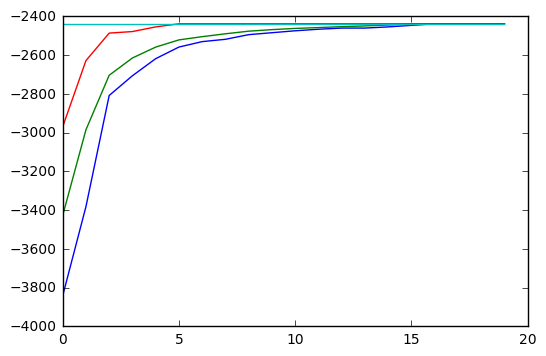

In [11]:
solve_qap('nug21', 20, 200, 120, .3, 1, mutation=local_search_plus)

Optimal solution for nug22: 3596.0
Starting iteration 1 out of 20...
Current population stats: 	-5726.000 	-5131.730 	-4518.000
Starting iteration 2 out of 20...
Current population stats: 	-4394.000 	-4103.360 	-3812.000
Starting iteration 3 out of 20...
Current population stats: 	-3964.000 	-3837.420 	-3670.000
Starting iteration 4 out of 20...
Current population stats: 	-3788.000 	-3724.600 	-3596.000
Starting iteration 5 out of 20...
Current population stats: 	-3712.000 	-3673.980 	-3596.000
Starting iteration 6 out of 20...
Current population stats: 	-3668.000 	-3641.420 	-3596.000
Starting iteration 7 out of 20...
Current population stats: 	-3646.000 	-3619.430 	-3596.000
Starting iteration 8 out of 20...
Current population stats: 	-3614.000 	-3605.490 	-3596.000
Starting iteration 9 out of 20...
Current population stats: 	-3602.000 	-3598.510 	-3596.000
Starting iteration 10 out of 20...
Current population stats: 	-3596.000 	-3596.000 	-3596.000
Starting iteration 11 out of 20...

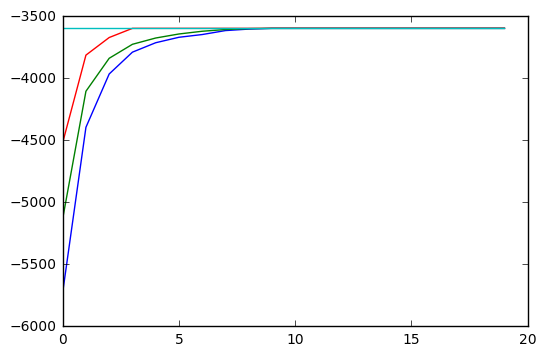

In [7]:
solve_qap('nug22', 20, 200, 200, .3, 1, mutation=local_search_plus)

Optimal solution for nug24: 3488.0
Starting iteration 1 out of 20...
Current population stats: 	-5176.000 	-4765.280 	-4326.000
Starting iteration 2 out of 20...
Current population stats: 	-4182.000 	-4002.220 	-3800.000
Starting iteration 3 out of 20...
Current population stats: 	-3894.000 	-3787.220 	-3610.000
Starting iteration 4 out of 20...
Current population stats: 	-3750.000 	-3685.950 	-3568.000
Starting iteration 5 out of 20...
Current population stats: 	-3670.000 	-3624.280 	-3500.000
Starting iteration 6 out of 20...
Current population stats: 	-3626.000 	-3590.130 	-3488.000
Starting iteration 7 out of 20...
Current population stats: 	-3594.000 	-3566.040 	-3488.000
Starting iteration 8 out of 20...
Current population stats: 	-3574.000 	-3547.100 	-3488.000
Starting iteration 9 out of 20...
Current population stats: 	-3564.000 	-3523.210 	-3488.000
Starting iteration 10 out of 20...
Current population stats: 	-3526.000 	-3493.330 	-3488.000
Starting iteration 11 out of 20...

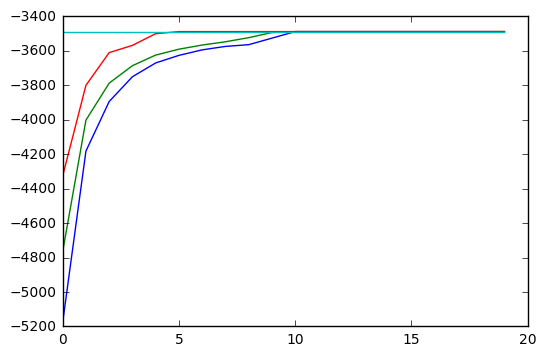

In [22]:
solve_qap('nug24', 20, 200, 200, .3, 1, mutation=local_search_plus)

Optimal solution for nug25: 3744.0
Starting iteration 1 out of 20...
Current population stats: 	-5430.000 	-5000.867 	-4558.000
Starting iteration 2 out of 20...
Current population stats: 	-4444.000 	-4256.327 	-4066.000
Starting iteration 3 out of 20...
Current population stats: 	-4152.000 	-4037.253 	-3866.000
Starting iteration 4 out of 20...
Current population stats: 	-3986.000 	-3926.240 	-3784.000
Starting iteration 5 out of 20...
Current population stats: 	-3918.000 	-3863.760 	-3778.000
Starting iteration 6 out of 20...
Current population stats: 	-3862.000 	-3827.060 	-3768.000
Starting iteration 7 out of 20...
Current population stats: 	-3834.000 	-3805.093 	-3758.000
Starting iteration 8 out of 20...
Current population stats: 	-3810.000 	-3788.513 	-3758.000
Starting iteration 9 out of 20...
Current population stats: 	-3784.000 	-3778.820 	-3756.000
Starting iteration 10 out of 20...
Current population stats: 	-3780.000 	-3774.227 	-3756.000
Starting iteration 11 out of 20...

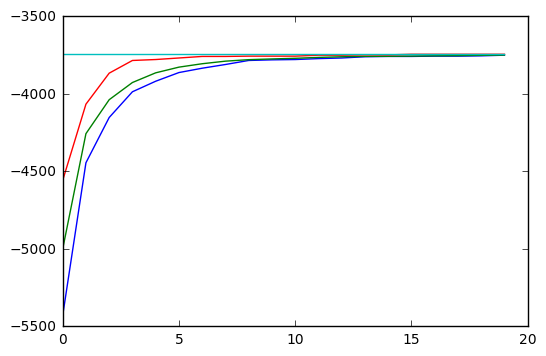

In [26]:
solve_qap('nug25', 20, 300, 300, .3, 1, mutation=local_search_plus)

Optimal solution for nug25: 3744.0
Starting iteration 1 out of 20...
Current population stats: 	-5396.000 	-5013.580 	-4560.000
Starting iteration 2 out of 20...
Current population stats: 	-4980.000 	-4444.000 	-4002.000
Starting iteration 3 out of 20...
Current population stats: 	-4232.000 	-4098.550 	-3862.000
Starting iteration 4 out of 20...
Current population stats: 	-4094.000 	-4000.530 	-3808.000
Starting iteration 5 out of 20...
Current population stats: 	-4008.000 	-3943.930 	-3770.000
Starting iteration 6 out of 20...
Current population stats: 	-3958.000 	-3904.000 	-3748.000
Starting iteration 7 out of 20...
Current population stats: 	-3926.000 	-3877.230 	-3744.000
Starting iteration 8 out of 20...
Current population stats: 	-3902.000 	-3854.690 	-3744.000
Starting iteration 9 out of 20...
Current population stats: 	-3874.000 	-3826.710 	-3744.000
Starting iteration 10 out of 20...
Current population stats: 	-3842.000 	-3804.670 	-3744.000
Starting iteration 11 out of 20...

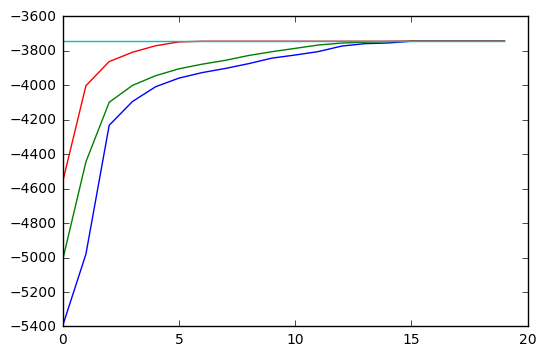

In [10]:
solve_qap('nug25', 20, 200, 120, .3, 1, mutation=lsps(10, .9))

# chyba lepiej niż powyżej

Optimal solution for nug27: 5234.0
Starting iteration 1 out of 20...
Current population stats: 	-7940.000 	-7135.890 	-6580.000
Starting iteration 2 out of 20...
Current population stats: 	-7062.000 	-6269.620 	-5582.000
Starting iteration 3 out of 20...
Current population stats: 	-5934.000 	-5743.760 	-5446.000
Starting iteration 4 out of 20...
Current population stats: 	-5730.000 	-5602.390 	-5358.000
Starting iteration 5 out of 20...
Current population stats: 	-5612.000 	-5526.080 	-5354.000
Starting iteration 6 out of 20...
Current population stats: 	-5536.000 	-5464.260 	-5318.000
Starting iteration 7 out of 20...
Current population stats: 	-5478.000 	-5418.470 	-5302.000
Starting iteration 8 out of 20...
Current population stats: 	-5432.000 	-5387.900 	-5276.000
Starting iteration 9 out of 20...
Current population stats: 	-5400.000 	-5362.110 	-5276.000
Starting iteration 10 out of 20...
Current population stats: 	-5374.000 	-5342.810 	-5268.000
Starting iteration 11 out of 20...

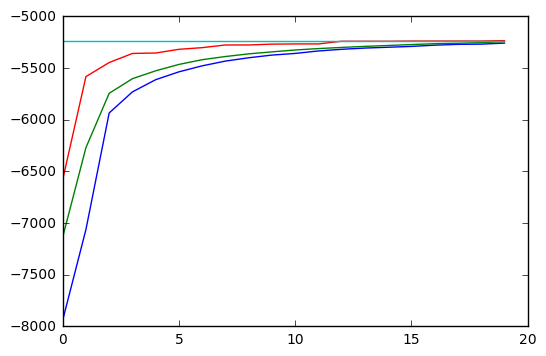

In [11]:
solve_qap('nug27', 20, 200, 120, .3, 1, mutation=lsps(10, .9))

Optimal solution for nug28: 5166.0
Starting iteration 1 out of 30...
Current population stats: 	-7476.000 	-6928.047 	-6350.000
Starting iteration 2 out of 30...
Current population stats: 	-6848.000 	-6102.200 	-5490.000
Starting iteration 3 out of 30...
Current population stats: 	-5838.000 	-5685.707 	-5400.000
Starting iteration 4 out of 30...
Current population stats: 	-5670.000 	-5546.367 	-5330.000
Starting iteration 5 out of 30...
Current population stats: 	-5554.000 	-5468.027 	-5326.000
Starting iteration 6 out of 30...
Current population stats: 	-5474.000 	-5411.827 	-5250.000
Starting iteration 7 out of 30...
Current population stats: 	-5422.000 	-5374.260 	-5236.000
Starting iteration 8 out of 30...
Current population stats: 	-5384.000 	-5344.560 	-5218.000
Starting iteration 9 out of 30...
Current population stats: 	-5358.000 	-5320.947 	-5204.000
Starting iteration 10 out of 30...
Current population stats: 	-5334.000 	-5301.347 	-5194.000
Starting iteration 11 out of 30...

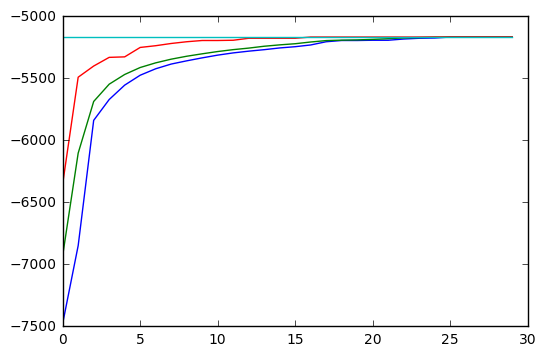

In [15]:
solve_qap('nug28', 30, 300, 200, .3, 1, mutation=lsps(10, .9))

Optimal solution for nug30: 6124.0
Starting iteration 1 out of 40...
Current population stats: 	-8750.000 	-8123.090 	-7458.000
Starting iteration 2 out of 40...
Current population stats: 	-8032.000 	-7231.063 	-6548.000
Starting iteration 3 out of 40...
Current population stats: 	-6936.000 	-6760.376 	-6382.000
Starting iteration 4 out of 40...
Current population stats: 	-6768.000 	-6617.600 	-6322.000
Starting iteration 5 out of 40...
Current population stats: 	-6632.000 	-6520.100 	-6234.000
Starting iteration 6 out of 40...
Current population stats: 	-6532.000 	-6445.727 	-6204.000
Starting iteration 7 out of 40...
Current population stats: 	-6468.000 	-6397.106 	-6204.000
Starting iteration 8 out of 40...
Current population stats: 	-6418.000 	-6357.320 	-6190.000
Starting iteration 9 out of 40...
Current population stats: 	-6376.000 	-6322.480 	-6186.000
Starting iteration 10 out of 40...
Current population stats: 	-6340.000 	-6294.930 	-6186.000
Starting iteration 11 out of 40...

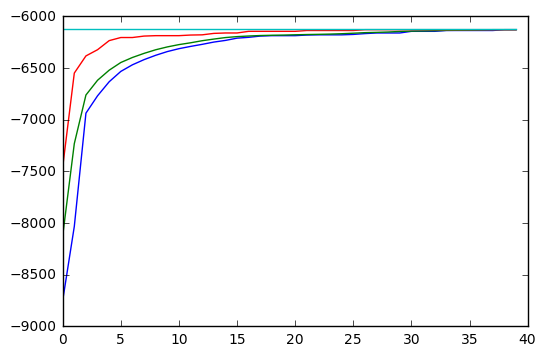

In [13]:
solve_qap('nug30', 40, 600, 400, .3, 1, mutation=lsps(10, .9), crossover=ox)

# nie udało się dokładnie

# tai

Optimal solution for tai50a: 4938796.0
Starting iteration 1 out of 50...
Current population stats: 	-6100064.000 	-5905121.500 	-5724378.000
Starting iteration 2 out of 50...
Current population stats: 	-5854914.000 	-5556739.500 	-5368786.000
Starting iteration 3 out of 50...
Current population stats: 	-5478690.000 	-5409986.500 	-5275326.000
Starting iteration 4 out of 50...
Current population stats: 	-5394736.000 	-5338866.500 	-5223830.000
Starting iteration 5 out of 50...
Current population stats: 	-5337552.000 	-5294157.000 	-5191202.000
Starting iteration 6 out of 50...
Current population stats: 	-5293338.000 	-5257684.000 	-5168872.000
Starting iteration 7 out of 50...
Current population stats: 	-5257718.000 	-5230042.500 	-5140972.000
Starting iteration 8 out of 50...
Current population stats: 	-5233336.000 	-5208459.500 	-5122838.000
Starting iteration 9 out of 50...
Current population stats: 	-5212208.000 	-5190838.500 	-5122838.000
Starting iteration 10 out of 50...
Current 

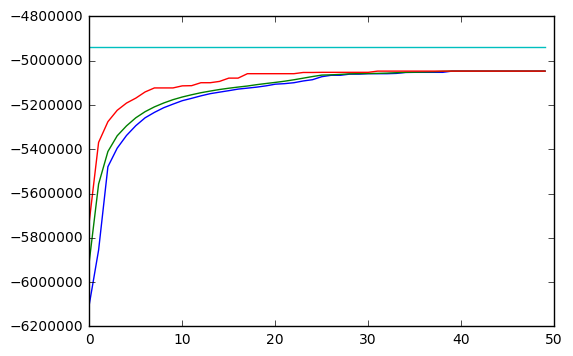

In [5]:
solve_qap('tai50a', 50, 1000, 800, .3, 1, mutation=lsps(10, .9))

Optimal solution for tai60a: 7205962.0
Starting iteration 1 out of 50...
Current population stats: 	-8726794.000 	-8518934.000 	-8241594.000
Starting iteration 2 out of 50...
Current population stats: 	-8460922.000 	-8118485.500 	-7909444.000
Starting iteration 3 out of 50...
Current population stats: 	-8025264.000 	-7941889.500 	-7743532.000
Starting iteration 4 out of 50...
Current population stats: 	-7930358.000 	-7864265.500 	-7692420.000
Starting iteration 5 out of 50...
Current population stats: 	-7868480.000 	-7818171.500 	-7676462.000
Starting iteration 6 out of 50...
Current population stats: 	-7830708.000 	-7785771.500 	-7623232.000
Starting iteration 7 out of 50...
Current population stats: 	-7803650.000 	-7762694.000 	-7623232.000
Starting iteration 8 out of 50...
Current population stats: 	-7782082.000 	-7742396.500 	-7590372.000
Starting iteration 9 out of 50...
Current population stats: 	-7761956.000 	-7726021.000 	-7590372.000
Starting iteration 10 out of 50...
Current 

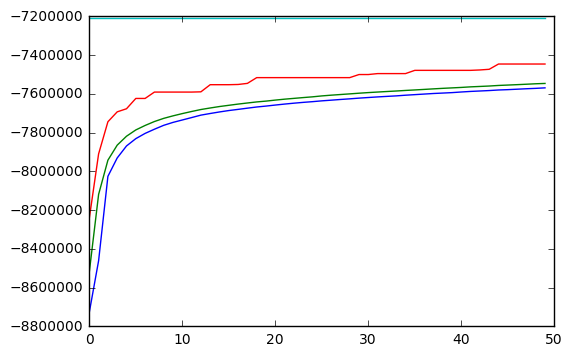

In [3]:
solve_qap('tai60a', 200, 1000, 800, .3, 1, mutation=lsps(10, .9, k=1000))

Optimal solution for tai80a: 13499184.0
Starting iteration 1 out of 400...
Current population stats: 	-15950144.000 	-15630661.000 	-15342096.000
Starting iteration 2 out of 400...
Current population stats: 	-15550028.000 	-15150911.000 	-14842892.000
Starting iteration 3 out of 400...
Current population stats: 	-15042530.000 	-14922671.000 	-14646408.000
Starting iteration 4 out of 400...
Current population stats: 	-14906402.000 	-14811156.000 	-14573644.000
Starting iteration 5 out of 400...
Current population stats: 	-14820026.000 	-14751237.000 	-14572192.000
Starting iteration 6 out of 400...
Current population stats: 	-14768928.000 	-14710118.000 	-14488198.000
Starting iteration 7 out of 400...
Current population stats: 	-14734848.000 	-14681683.000 	-14488198.000
Starting iteration 8 out of 400...
Current population stats: 	-14709082.000 	-14658191.000 	-14488198.000
Starting iteration 9 out of 400...
Current population stats: 	-14687802.000 	-14639135.000 	-14452060.000
Starti

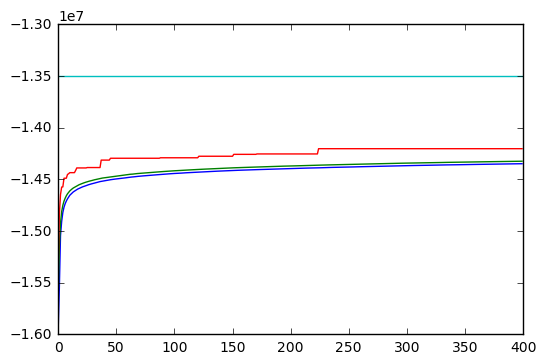

In [7]:
solve_qap('tai80a', 400, 1000, 800, .3, 1, mutation=lsps(10, .9, k=200))